# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [319]:
#Импорт библиотек
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [320]:
#Считаем датасет
df = pd.read_csv('/datasets/games.csv').reset_index()
# Посмотрим данные
df

,index,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### Имеется таблица с 11 столбцами и почти 17к строками. Видно, что в данных имеются пропуски. Пропуски в рейтинге п возрасту возможно обусловлены тем, что к ним не была применена данная классификация. Либо, возможно она различна в разных странах. Пропуски в рейтинге отзывов критиков и пользователей могут быть обусловлены отсутствие достаточного количества собранных отзывов.

### Шаг 2. Подготовьте данные

##### 1)Замените названия столбцов (приведите к нижнему регистру)

In [321]:
df.columns = df.columns.str.lower()
#Проверим
df

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### 2) Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [322]:
#Изучим тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
index              16715 non-null int64
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [323]:
#Заменим рейтинг на числовой тип, а год на тип дата
df.loc[(df['user_score'].isnull() != True) & (df['user_score'] != 'tbd'), 'user_score'] = pd.to_numeric(df.loc[(df['user_score'].isnull() != True) & (df['user_score'] != 'tbd'), 'user_score'])
df.loc[(df['year_of_release'].isnull() != True), 'year_of_release'] = pd.to_datetime(df.loc[(df['year_of_release'].isnull() != True), 'year_of_release'], format='%Y-%m-%d')

##### 3)Обработайте пропуски при необходимости

In [324]:
#Пропущено два значения в названии игр, избавимся от этих строк, так как не сможем их восстановить
df = df.dropna(subset = ['name'])

In [325]:
#Посмотрим и на наличие других пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
index              16713 non-null int64
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null object
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [326]:
#Посмотри, какой процент пропусков в году выпуска
df['year_of_release'].isnull().mean()

0.016095255190570215

In [327]:
#Пропущено примерно 1,6% значений. Избавимся от них, так как не сможем восствновить пропуски и это количество не существенно
df = df.dropna(subset = ['year_of_release'])

##### Теоретически, одна и та же игра могла выпускаться на разные платформы, и можно было бы заменять пропуски выпуска игры  по аналогичному ее выпуску на другие платформы. Либо делать поиск по интернету. Но в этом нет смысла, так как пропусков 1,6 процентов, и мы можем не учитывать эти данные.

In [328]:
#В рейтинге пользователей заменим tbd на пропуск, так как рейтинг еще не выставлен
df['user_score'].replace('tbd', np.nan, inplace=True)

##### Строки с пропусками в названии и годе выпуска игры были удалены. Пропуски в рейтинге критиков, пользователей и в возростном рейтинге оставим без изменений, так как восстановить из значение не получится, и пропусков слишком много, чтобы удалить строки с ними. Дале при работе, если понадобится, учтем эти пропуски.

#### 4) Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [329]:
#Создаем столбец с суммарными продажами
df['sum_sales'] = df['na_sales'] + df['eu_sales'] +df['jp_sales'] +df['other_sales']
#Проверяем
df.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Шаг 3. Проведите исследовательский анализ данных
#### 1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

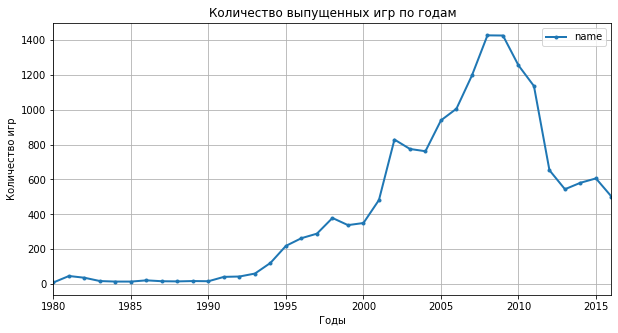

In [330]:
#Визуализируем
df.pivot_table(index='year_of_release', values='name', aggfunc = 'count').reset_index().plot(x='year_of_release', y='name', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Количество выпущенных игр по годам')
plt.ylabel("Количество игр")
plt.xlabel("Годы")
plt.show()

In [331]:
# Удалим года с выпуском до 1990-го, так как это в них очень малые выборки выпущенных игр
df = df.query('year_of_release > 1990')

#### Видно, что число выпускаемых игр в год росло с 1980 до 2008, а с 2010 началось падение числа выпускаемых игр

#### 2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [332]:
#Рассмотрим платформы по суммарным продажам 
df.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales', ascending=False)

,platform,sum_sales
15,PS2,1233.56
27,X360,961.24
16,PS3,931.34
25,Wii,891.18
3,DS,802.76
14,PS,727.58
17,PS4,314.14
5,GBA,312.88
18,PSP,289.53
1,3DS,257.81


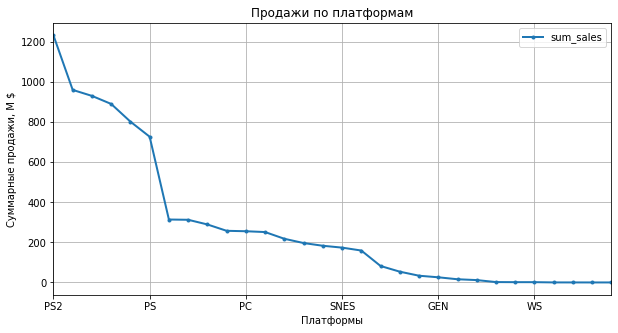

In [333]:
# Визуализируем
df.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales', ascending=False).plot(x='platform', y='sum_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи по платформам')
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи, М $")
plt.show()

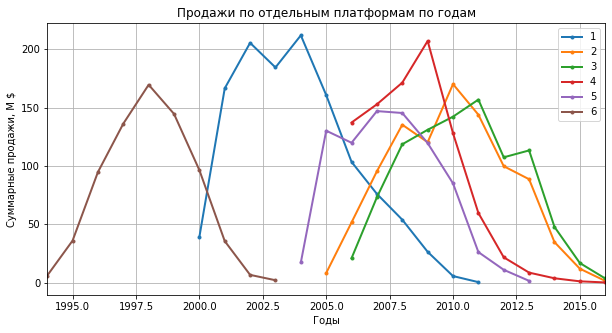

In [334]:
# Визуализируем продажи игр в год на самые популярные платформы
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for one in platforms:
    df.query('platform == @one').groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='sum_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи по отдельным платформам по годам')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи, М $")
    plt.legend('123456')
plt.show()
    
    

#### Видно, что разные платформы были выпущены в разное время. После чего шел рост их продаж до определенного пика, затем спад. Среднее время жизни платформ, судя по графику, около 7-10 лет. И самые популярные платформы по проданным на них играм уже значительно спадают к 2016 году. Поэтому рассмотрим платформы с 20014 года. Возможно, на некоторые платформы спад продаж игр на них еще не наступил.

In [335]:
df_since2014 = df.query('year_of_release >= 2014')
#Рассмотрим платформы по суммарным продажам 
df_since2014.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales', ascending=False)

,platform,sum_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


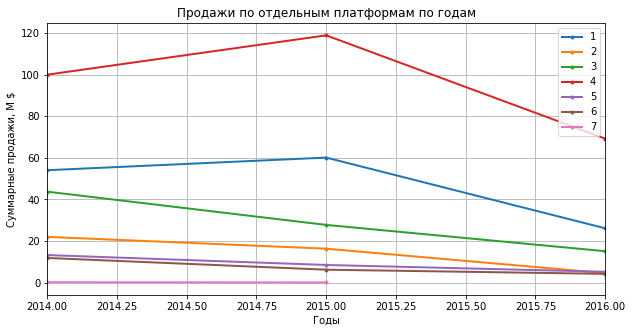

In [336]:
# Визуализируем продажи игр в год на платформы, которые не были рассмотрены в предыдущем построении графика
platforms = ['XOne', 'WiiU', '3DS', 'PS4', 'PC', 'PSV', 'PSP']
for one in platforms:
    df_since2014.query('platform == @one').groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='sum_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи по отдельным платформам по годам')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи, М $")
    plt.legend('1234567')
plt.show()
    

##### За последние перед 2016 годом  и на ранее не рассмотренные платформы наблюдается спад продаж игр.

#### 3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

##### Оставим период с 2008 года, так как с него начинается спад продаж самых популярных по продажам игрплатформ. Период 2008-2016  является конечным на данный момент развития игровой индустрии и включает в себя 8 лет - цикл жизни платформы.

In [337]:
# Оставим для анализа актуальный период времени для прогнозирования продаж на будущий год
df['year_of_release'] = df['year_of_release'].astype('int')
df = df.query('year_of_release > 2008')
df.pivot_table(index='platform', values='sum_sales', aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales', ascending=False)

,platform,sum_sales
4,PS3,718.67
10,X360,670.70
8,Wii,429.94
5,PS4,314.14
0,3DS,257.81
1,DS,243.29
11,XOne,159.32
2,PC,138.87
6,PSP,101.83
9,WiiU,82.19


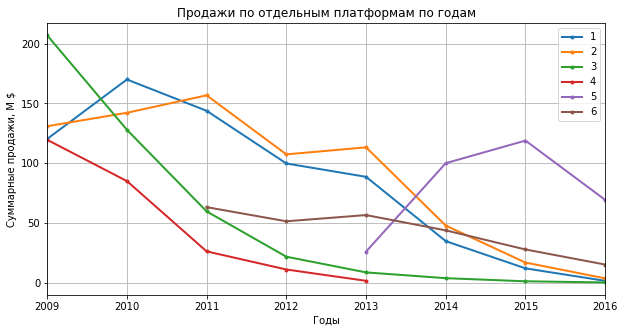

In [338]:
#Выберем платформы с наибольшими продажами и наименьшим падением
platforms = ['X360', 'PS3', 'Wii', 'DS', 'PS4', '3DS']
for one in platforms:
    df.query('platform == @one').groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='all_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи по отдельным платформам по годам')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи, М $")
    plt.legend('123456')
    

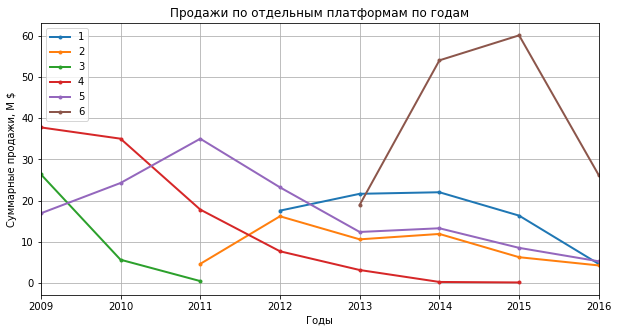

In [339]:
#Рассмотрим и остальные платформы
platforms = [ 'WiiU', 'PSV', 'PS2', 'PSP', 'PC', 'XOne']
for one in platforms:
    df.query('platform == @one').groupby('year_of_release')['sum_sales'].sum().plot(x='year_of_release', y='all_sales', style='.-', kind ='line', fontsize=10, linewidth=2, figsize=(10,5), grid = True).set_title('Продажи по отдельным платформам по годам')
    plt.xlabel("Годы")
    plt.ylabel("Суммарные продажи, М $")
    plt.legend('123456')

##### К 2016 году падают продажи игр на все платформы. Возможно, это связано с тем, что людям нравятся "классические игры", такие как Mortal Kombat или FIFA. К тому же, сейчас доволно много игр доступны на смартфонах. Однако все еще можно выделить самые порпулярные платформы: 'PS4', '3DS', 'X360', 'PS3', 'XOne'. PS3 и PS4 уже на конечном этапе жизненного цикла и вряд ли будут популярны в 2017 году. В итоге выделим:  '3DS', 'X360', 'XOne'  и 'WiiU' как платформа, которая появилась относительно недавно в 2012 году. Возможно для нее еще будет пик популярности.

#### 4) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

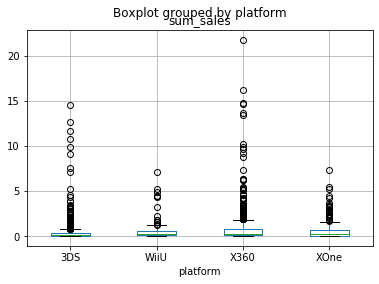

In [340]:
#Выделим самые перспективные платформы
platforms = ['3DS', 'X360', 'WiiU', 'XOne']
df.query('platform in @platforms').boxplot(by = 'platform', column = 'sum_sales')

##### Средняя продажа каждой игры на разных платформах в среднем ровнялась 1M долларов. Однако наблюдются выбросы в большую строну для самых продаваемых игр, особенно для платформы X360 и 3DS. Возможно, такие выбросы сформированы самыми популярными играми, которые при этом выходили не на все платформы.

#### 5) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

Text(0, 0.5, 'Суммарные продажи, М $')

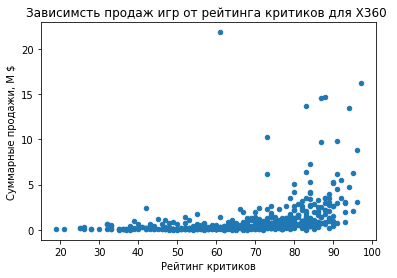

In [341]:
#Посмотрим на график рассеяния продаж в зависимости от рейтинга критиков для X360
df.query('critic_score >= 0 & platform == "X360"').plot(x='critic_score', y='sum_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга критиков для X360 ')
plt.xlabel("Рейтинг критиков")
plt.ylabel("Суммарные продажи, М $")

In [342]:
#Посмотрим и на корреляцию
print('Корреляция между оценкой игр критиками и их продажами на платформу X360 =', round(df.query('critic_score >= 0 & platform == "X360"')['critic_score'].corr(df.query('critic_score >= 0 & platform == "X360"')['sum_sales']), 3))

Корреляция между оценкой игр критиками и их продажами на платформу X360 = 0.364


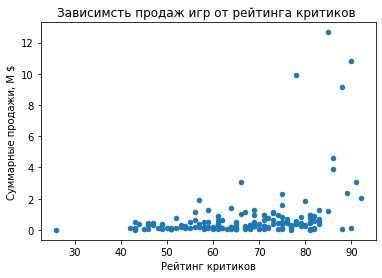

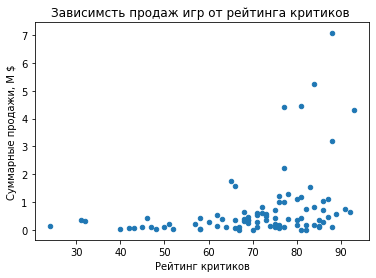

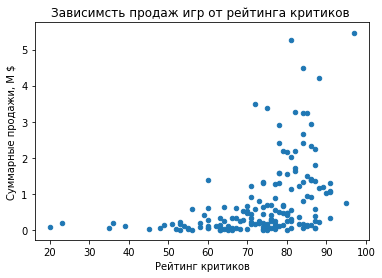

In [343]:
#Посмотрим на график рассеяния продаж в зависимости от рейтинга критиков для других платформ
platforms = ['3DS', 'WiiU', 'XOne']
for one in platforms:
    df.query('platform == @one').plot(x='critic_score', y='sum_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга критиков ')
    plt.xlabel("Рейтинг критиков")
    plt.ylabel("Суммарные продажи, М $")

In [344]:
#Посмотрим и на корреляцию
print('Корреляция между оценкой игр критиками и их продажами на платформу 3DS =', round(df.query('critic_score >= 0 & platform == "3DS"')['critic_score'].corr(df.query('critic_score >= 0 & platform == "3DS"')['sum_sales']), 3))
print('Корреляция между оценкой игр критиками и их продажами на платформу WiiU =', round(df.query('critic_score >= 0 & platform == "WiiU"')['critic_score'].corr(df.query('critic_score >= 0 & platform == "WiiU"')['sum_sales']), 3))
print('Корреляция между оценкой игр критиками и их продажами на платформу XOne =', round(df.query('critic_score >= 0 & platform == "XOne"')['critic_score'].corr(df.query('critic_score >= 0 & platform == "XOne"')['sum_sales']), 3))

Корреляция между оценкой игр критиками и их продажами на платформу 3DS = 0.349
Корреляция между оценкой игр критиками и их продажами на платформу WiiU = 0.348
Корреляция между оценкой игр критиками и их продажами на платформу XOne = 0.417


Text(0, 0.5, 'Суммарные продажи, М $')

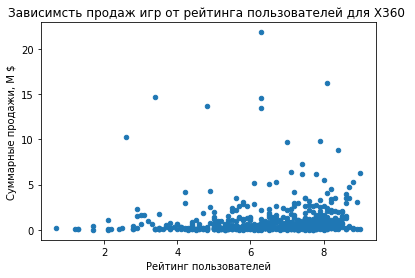

In [345]:
#Посмотрим на график рассеяния продаж в зависимости от рейтинга пользователей для X360
df.query('user_score >= 0 & platform == "X360"').plot(x='user_score', y='sum_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга пользователей для X360 ')
plt.xlabel("Рейтинг пользователей")
plt.ylabel("Суммарные продажи, М $")

In [346]:
#Посторим на корреляцию
print('Корреляция между оценкой игр критиками и их продажами на платформу X360 =', round(df.query('user_score >= 0 & platform == "X360"')['critic_score'].corr(df.query('user_score >= 0 & platform == "X360"')['sum_sales']), 3))

Корреляция между оценкой игр критиками и их продажами на платформу X360 = 0.361


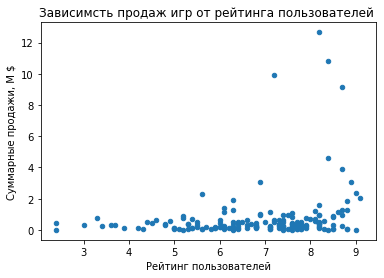

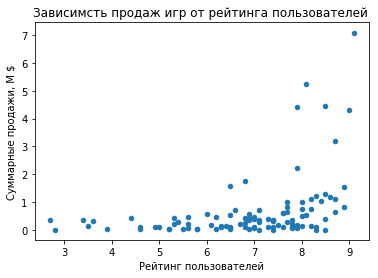

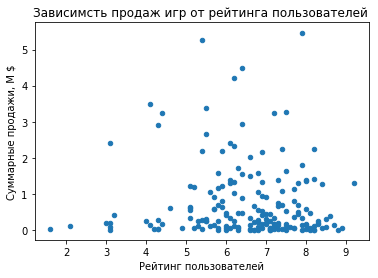

In [347]:
#Посмотрим на график рассеяния продаж в зависимости от рейтинга пользовтелей и для других платформ
platforms = ['3DS', 'WiiU', 'XOne']
for one in platforms:
    df.query('platform == @one').plot(x='user_score', y='sum_sales', kind='scatter').set_title('Зависимсть продаж игр от рейтинга пользователей ')
    plt.xlabel("Рейтинг пользователей")
    plt.ylabel("Суммарные продажи, М $")

In [348]:
#Посмотрим и на корреляцию
print('Корреляция между оценкой игр пользователями и их продажами на платформу 3DS =', round(df.query('user_score >= 0 & platform == "3DS"')['user_score'].corr(df.query('user_score >= 0 & platform == "3DS"')['sum_sales']), 3))
print('Корреляция между оценкой игр пользователями и их продажами на платформу WiiU =', round(df.query('user_score >= 0 & platform == "WiiU"')['user_score'].corr(df.query('user_score >= 0 & platform == "WiiU"')['sum_sales']), 3))
print('Корреляция между оценкой игр пользователями и их продажами на платформу XOne =', round(df.query('user_score >= 0 & platform == "XOne"')['user_score'].corr(df.query('user_score >= 0 & platform == "XOne"')['sum_sales']), 3))

Корреляция между оценкой игр пользователями и их продажами на платформу 3DS = 0.222
Корреляция между оценкой игр пользователями и их продажами на платформу WiiU = 0.4
Корреляция между оценкой игр пользователями и их продажами на платформу XOne = -0.069


##### Можно сделать вывод, что рейтинг критиков коррелирует с продажами игр, особенно для игр с рейтингом от 70-80. Об этом говорит и положительная корреляция. Скорее всего перед покупкой игр пользователи смотрят на рейтинг критиков и таким образом выбирают те, рейтинг у которых высокий.
##### А вот явной зависимости продаж игр от рейтинга пользователей, которая была бы  справедлива для разных платформ, нет. Для X360 и WiiU она имеет примерно те же значения, что и корреляция с рейтингом критиков. Для 3DS она ниже, но имеет положительное значение. Для XOne она имеет небольшое отрицательное значение. Возможно, для X360 и WiiU было выпущено ольше популярных игр, которые положительно оценили и пользователи, и критики.

#### 6) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [349]:
#Посмотрим, на какие жанры выходит больше всего игр
pd.pivot_table(df, index='genre', values = 'name', aggfunc='count').reset_index()

,genre,name
0,Action,1767
1,Adventure,703
2,Fighting,252
3,Misc,782
4,Platform,182
5,Puzzle,193
6,Racing,321
7,Role-Playing,671
8,Shooter,500
9,Simulation,340


In [350]:
#Посмотрим, какие жанры самые продаваемые
pd.pivot_table(df, index='genre', values = 'sum_sales', aggfunc='sum').reset_index().sort_values(by = 'sum_sales', ascending=False)

,genre,sum_sales
0,Action,810.78
8,Shooter,549.03
10,Sports,465.76
7,Role-Playing,362.59
3,Misc,310.37
4,Platform,160.25
6,Racing,156.37
2,Fighting,113.49
9,Simulation,104.67
1,Adventure,81.23


##### На жанры Action, Adventure и Fighting выходит больше всего игр, а игры жанров Action, Shooter и Sports самые продаваемые.

##### Был проведен анализ посамым популярным платформам и коичеству выпускаемых игр разные промежутки времени. Были рассмотрены зависимости продаж игр о рейтинга критиков и пользователей, самые популярные и продаваемые жанры игр.

##### Число выпускаемых игр в год росло с 1980 до 2008, а с 2010 началось падение числа выпускаемых игр

##### Было решено оставить период с 2008 года, так как с него начинается спад продаж самых популярных по продажам игрплатформ. Период 2008-2016 является конечным на данный момент развития игровой индустрии и включает в себя 8 лет - цикл жизни платформы.

##### К 2016 году падают продажи игр на все платформы. Возможно, это связано с тем, что людям нравятся "классические игры", такие как Mortal Kombat или FIFA. К тому же, сейчас доволно много игр доступны на смартфонах. Однако все еще можно выделить самые порпулярные платформы: 'PS4', '3DS', 'X360', 'PS3', 'XOne'. PS3 и PS4 уже на конечном этапе жизненного цикла и вряд ли будут популярны в 2017 году. В итоге выделим: '3DS', 'X360', 'XOne' и 'WiiU' как платформа, которая появилась относительно недавно в 2012 году. Возможно для нее еще будет пик популярности.

##### Средняя продажа каждой игры на разных платформах в среднем ровнялась 1M долларов. Однако наблюдются выбросы в большую строну для самых продаваемых игр, особенно для платформы X360 и 3DS. Возможно, такие выбросы сформированы самыми популярными играми, которые при этом выходили не на все платформы.

##### Можно сделать вывод, что рейтинг критиков коррелирует с продажами игр, особенно для игр с рейтингом от 70-80. Об этом говорит и положительная корреляция. Скорее всего перед покупкой игр пользователи смотрят на рейтинг критиков и таким образом выбирают те, рейтинг у которых высокий.

##### А вот явной зависимости продаж игр от рейтинга пользователей, которая была бы справедлива для разных платформ, нет. Для X360 и WiiU она имеет примерно те же значения, что и корреляция с рейтингом критиков. Для 3DS она ниже, но имеет положительное значение. Для XOne она имеет небольшое отрицательное значение. Возможно, для X360 и WiiU было выпущено ольше популярных игр, которые положительно оценили и пользователи, и критики.

##### На жанры Action, Adventure и Fighting выходит больше всего игр, а игры жанров Action, Shooter и Sports самые продаваемые. Action помогает людям азнообразит обыденность жтзни, так же как и Adventure, Fighting и Shooter. Жанр Sports позволяет любителям смотреть спортивные соревнования.

### Шаг 4. Составьте портрет пользователя каждого региона

#### Определите для пользователя каждого региона (NA, EU, JP):
##### 1) Самые популярные платформы (топ-5). Опишите различия в долях продаж.
##### 2) Самые популярные жанры (топ-5). Поясните разницу.
##### 3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [351]:
#Посмотрим на самые популярные, судя по продажам на них игр, платформы в Северной Америке
df_na = df.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').reset_index()
df_na['%'] = round(df_na['na_sales']/(df_na['na_sales'].sum()),2)*100
df_na.sort_values(by = 'na_sales', ascending=False).head(5)

,platform,na_sales,%
10,X360,408.18,28.0
4,PS3,291.90,20.0
8,Wii,235.75,16.0
1,DS,120.61,8.0
5,PS4,108.74,7.0


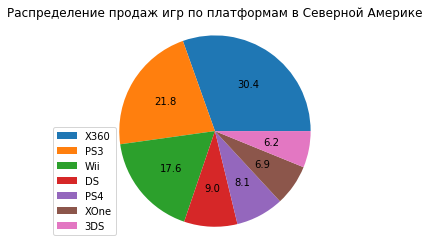

In [352]:
#Визуализируем топ 7 платформ
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по платформам в Северной Америке')
plt.pie(
    df_na.sort_values(by = 'na_sales', ascending=False).head(7)['na_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = df_na.sort_values(by = 'na_sales', ascending=False).head(7)['platform'] )

In [353]:
#Посмотрим на самые популярные, судя по продажам на них игр, жанры в Северной Америке
na_genre = pd.pivot_table(df, index='genre', values = 'na_sales', aggfunc='sum').reset_index().sort_values(by = 'na_sales', ascending=False)
na_genre.head(5)

,genre,na_sales
0,Action,361.72
8,Shooter,276.37
10,Sports,227.66
3,Misc,164.40
7,Role-Playing,130.83


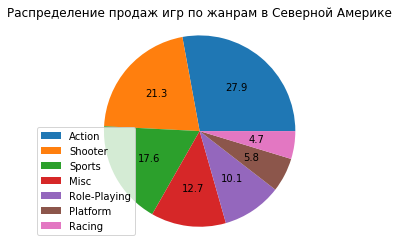

In [354]:
#Визуализируем топ 7 жанров
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по жанрам в Северной Америке')
plt.pie(
    na_genre.head(7)['na_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = na_genre.head(7)['genre'] )

In [355]:
#Посмотрим на самые популярные, судя по продажам на них игр, рейтинги ESRP в Северной Америке
na_rating = pd.pivot_table(df, index='rating', values = 'na_sales', aggfunc='sum').reset_index().sort_values(by = 'na_sales', ascending=False)
na_rating.head(5)

,rating,na_sales
3,M,440.86
0,E,403.16
5,T,227.11
1,E10+,202.94
2,EC,1.32


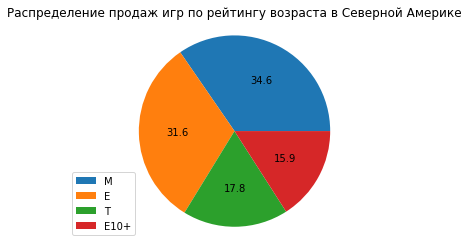

In [356]:
#Визуализируем топ 4 рейтингов по возрастам
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по рейтингу возраста в Северной Америке')
plt.pie(
    na_rating.head(4)['na_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = na_rating.head(4)['rating'] )

In [357]:
#Посмотрим на самые популярные, судя по продажам на них игр, платформы в Европе
df_eu = df.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').reset_index()
df_eu['%'] = round(df_eu['eu_sales']/(df_eu['eu_sales'].sum()),2)*100
df_eu.sort_values(by = 'eu_sales', ascending=False).head(5)

,platform,eu_sales,%
4,PS3,255.00,25.0
10,X360,196.72,19.0
5,PS4,141.09,14.0
8,Wii,124.22,12.0
2,PC,82.32,8.0


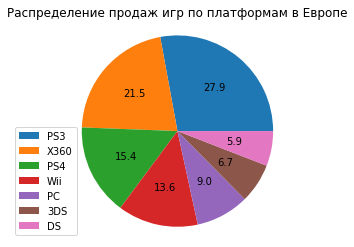

In [358]:
#Визуализируем топ 7 платформ
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по платформам в Европе')
plt.pie(
    df_eu.sort_values(by = 'eu_sales', ascending=False).head(7)['eu_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = df_eu.sort_values(by = 'eu_sales', ascending=False).head(7)['platform'] )

In [359]:
#Посмотрим на самые популярные, судя по продажам на них игр, жанры в Европе
eu_genre = pd.pivot_table(df, index='genre', values = 'eu_sales', aggfunc='sum').reset_index().sort_values(by = 'eu_sales', ascending=False)
eu_genre.head(5)

,genre,eu_sales
0,Action,271.91
8,Shooter,192.30
10,Sports,158.51
3,Misc,86.27
7,Role-Playing,83.56


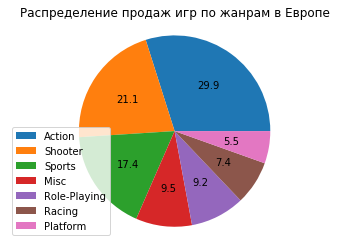

In [360]:
#Визуализируем топ 7 жанров
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по жанрам в Европе')
plt.pie(
    eu_genre.head(7)['eu_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = eu_genre.head(7)['genre'] )

In [361]:
#Посмотрим на самые популярные, судя по продажам на них игр, рейтинги ESRP в Европе
eu_rating = pd.pivot_table(df, index='rating', values = 'eu_sales', aggfunc='sum').reset_index().sort_values(by = 'eu_sales', ascending=False)
eu_rating.head(5)

,rating,eu_sales
3,M,326.50
0,E,261.50
5,T,153.28
1,E10+,121.63
4,RP,0.03


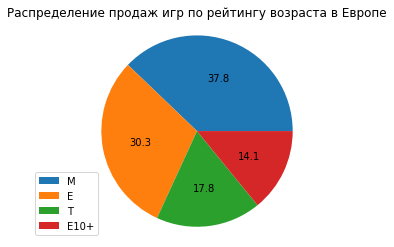

In [362]:
#Визуализируем топ 4 рейтингов по возрастам
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по рейтингу возраста в Европе')
plt.pie(
    eu_rating.head(4)['eu_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = eu_rating.head(4)['rating'] )

In [363]:
#Посмотрим на самые популярные, судя по продажам на них игр, платформы в Японии
df_jp = df.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').reset_index()
df_jp['%'] = round(df_jp['jp_sales']/(df_jp['jp_sales'].sum()),2)*100
df_jp.sort_values(by = 'jp_sales', ascending=False).head(5)

,platform,jp_sales,%
0,3DS,100.62,27.0
4,PS3,68.29,19.0
1,DS,52.11,14.0
6,PSP,50.39,14.0
8,Wii,34.32,9.0


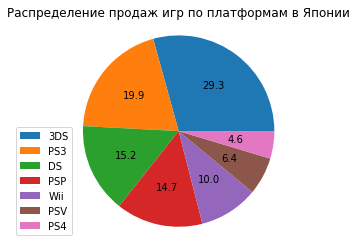

In [364]:
#Визуализируем топ 7 платформ
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по платформам в Японии')
plt.pie(
    df_jp.sort_values(by = 'jp_sales', ascending=False).head(7)['jp_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = df_jp.sort_values(by = 'jp_sales', ascending=False).head(7)['platform'] )

In [365]:
#Посмотрим на самые популярные, судя по продажам на них игр, жанры в Японии
jp_genre = pd.pivot_table(df, index='genre', values = 'jp_sales', aggfunc='sum').reset_index().sort_values(by = 'jp_sales', ascending=False)
jp_genre.head(5)

,genre,jp_sales
7,Role-Playing,120.61
0,Action,84.16
3,Misc,30.09
10,Sports,25.32
4,Platform,20.65


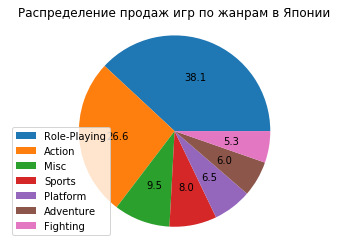

In [366]:
#Визуализируем топ 7 жанров
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по жанрам в Японии')
plt.pie(
    jp_genre.head(7)['jp_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = jp_genre.head(7)['genre'] )

In [367]:
#Посмотрим на самые популярные, судя по продажам на них игр, рейтинги ESRP в Японии
jp_rating = pd.pivot_table(df, index='rating', values = 'jp_sales', aggfunc='sum').reset_index().sort_values(by = 'jp_sales', ascending=False)
jp_rating.head(5)

,rating,jp_sales
0,E,61.49
5,T,50.59
3,M,35.63
1,E10+,20.82
2,EC,0.00


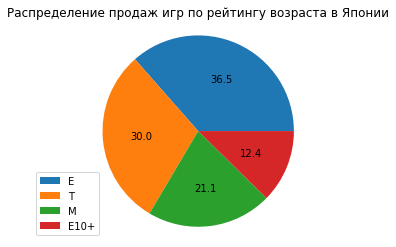

In [368]:
#Визуализируем топ 4 рейтингов по возрастам
fig, ax = plt.subplots()
ax.axis("equal")
plt.title('Распределение продаж игр по рейтингу возраста в Японии')
plt.pie(
    jp_rating.head(4)['jp_sales'], autopct='%.1f', radius = 1.1)
plt.legend(loc = 'lower left', labels = jp_rating.head(4)['rating'] )

##### Игры жанра action хорошо продаются везде. В японии самые популярные гры жанра Role-Playing, а в Европе и Северной Америке, кроме action, популярен жанр shooter. В Япони традиционно формировался отдельный жанр RPG, имеющий черты манги. Поэтому наблюдается отличие в предпочтениях пользователей. 
##### Платформа PS3 популярна во всех регионах, в Европе и Северной Америке высокую популярность имеют также платформы X360 и Wii, а в Японии DS и 3DS. Популярность этих присмтавок в Японии может быть обусловлена тем, что их выпустила Японская компания Нинтендо.
##### Везде самые популярные игры для всех, 17+ и для подростков. Можно сделать вывод, что подростки и взрослые чаще играют в игры на платформах.

### Шаг 5. Проверьте гипотезы
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [369]:
# Сделаем выборку по платформам
df_xone = df.query('platform == "XOne" & user_score >= 0')
df_pc = df.query('platform == "PC" & user_score >= 0')

##### Проверим гипотезу о равенстве пользовательского рейтинга игр на платформы Xbox One и PC
##### Критический уровень статистической значимости зададим значение 0.05.

In [370]:
alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    df_xone['user_score'], 
    df_pc['user_score'])
# ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3225831331399489
Не получилось отвергнуть нулевую гипотезу


##### Пользовательский рейтинг на игры на платформы Xbox One и PC равны

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
#### Выдвинем гипотезу, что они равны

In [371]:
#Сделаем выборку по жанрам
df_sport = df.query('genre == "Sports" & user_score >= 0')
df_action = df.query('genre == "Action" & user_score >= 0')

In [372]:
alpha = 0.05 # ваш код: задайте критический уровень статистической значимости

results = st.ttest_ind(
    df_sport['user_score'], 
    df_action['user_score'])
# ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0516734948473881e-15
Отвергаем нулевую гипотезу


##### Пользовательский рейтинг на игры жанров Sports и Action  отличается

### Шаг 6. Напишите общий вывод

##### Был предоставлен датасет с информацией по продажам разлиных игр на различные платформы. Были устранны строки с пропусками в названии игр и годе выпуска игр. Был создан дополнительный столбец с суммарными продажами игр по всем регионам

##### Анализ показал, что:
- Число выпускаемых игр в год росло с 1980 до 2008, а с 2010 началось падение числа выпускаемых игр. Было решено оставить период с 2008 года, так как с него начинается спад продаж самых популярных по продажам игрплатформ. Период 2008-2016 является конечным на данный момент развития игровой индустрии и включает в себя 8 лет - цикл жизни платформы.
- К 2016 году падают продажи игр на все платформы. Возможно, это связано с тем, что людям нравятся "классические игры", такие как Mortal Kombat или FIFA. К тому же, сейчас доволно много игр доступны на смартфонах. Однако все еще можно выделить самые порпулярные платформы: 'PS4', '3DS', 'X360', 'PS3', 'XOne'. PS3 и PS4 уже на конечном этапе жизненного цикла и вряд ли будут популярны в 2017 году. В итоге выделим: '3DS', 'X360', 'XOne' и 'WiiU' как платформа, которая появилась относительно недавно в 2012 году. Возможно для нее еще будет пик популярности.
- Средняя продажа каждой игры на разных платформах в среднем ровнялась 1M долларов. Однако наблюдются выбросы в большую строну для самых продаваемых игр, особенно для платформы X360 и 3DS. Возможно, такие выбросы сформированы самыми популярными играми, которые при этом выходили не на все платформы.
- Можно сделать вывод, что рейтинг критиков коррелирует с продажами игр, особенно для игр с рейтингом от 70-80. Об этом говорит и положительная корреляция. Скорее всего перед покупкой игр пользователи смотрят на рейтинг критиков и таким образом выбирают те, рейтинг у которых высокий.
- А вот явной зависимости продаж игр от рейтинга пользователей, которая была бы справедлива для разных платформ, нет. Для X360 и WiiU она имеет примерно те же значения, что и корреляция с рейтингом критиков. Для 3DS она ниже, но имеет положительное значение. Для XOne она имеет небольшое отрицательное значение. Возможно, для X360 и WiiU было выпущено ольше популярных игр, которые положительно оценили и пользователи, и критики.
- На жанры Action, Adventure и Fighting выходит больше всего игр, а игры жанров Action, Shooter и Sports самые продаваемые. Action помогает людям разнообразить обыденность жтзни, так же как и Adventure, Fighting и Shooter. Жанр Sports позволяет любителям смотреть спортивные соревнования.

##### Были составлены портреты предпочтений пользователей по регионам:
- Игры жанра action хорошо продаются везде. В японии самые популярные гры жанра Role-Playing, а в Европе и Северной Америке, кроме action, популярен жанр shooter. В Япони традиционно формировался отдельный жанр RPG, имеющий черты манги. Поэтому наблюдается отличие в предпочтениях пользователей.
- Платформа PS3 популярна во всех регионах, в Европе и Северной Америке высокую популярность имеют также платформы X360 и Wii, а в Японии DS и 3DS. Популярность этих присмтавок в Японии может быть обусловлена тем, что их выпустила Японская компания Нинтендо.
- Везде самые популярные игры для всех, 17+ и для подростков. Можно сделать вывод, что подростки и взрослые чаще играют в игры на платформах.

##### Были выдвинуты гипотезы :
- о равенстве пользовательских рейтингов на игры на платформы Xbox One и PC
- о равенстве рейтингов на игры жанров Sports и Action
#####  p-value тестирования показало, что:
- Пользовательский рейтинг на игры жанров Sports и Action отличается
- Пользовательский рейтинг на игры на платформы Xbox One и PC равны

##### Для рекламы стоит сделать упор на игры для всех возрастов и 17+ с высокой оценкой критиков, жанр Action и Shooter, в японии еще RPG. В первую очередь нужно обратить внимание на игры на следующих платформах: 'DS', '3DS', 'X360', "Wii", 'PS3', 'XOne' 